In [2]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics

loandf = pd.read_csv('prosperLoanData.csv')

In [4]:
loandf.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


##### Dataset:

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We will Focus your our exploration on about 10-15 variables.

The predictor (dependent variable) will be “Loan Status,” and the features (independent variables) will be selected from remaining columns.

In [5]:
# high-level overview of data shape and composition
# The first step is to discover what type of variables we’re dealing with 

print(loandf.shape)
print(loandf.dtypes)
print(loandf.head(81))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                 ListingKey  ListingNumber            ListingCreationDate  \
0   1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1   10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2   0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3   0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4   0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
..                      ...            ...                            

We can see that there are some numeric and string (object) data types in our dataset. 
But to be certain, we can use:

In [6]:
 # Shows data types for each column
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
loandf.describe() 

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

113937, 81
There are 11,3937 loan in the dataset with 81 features 
Most variables are numeric in nature, 
but the variables                              
are ordered factor variables with the following levels 


The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans!



LoanStatus (The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. )

EmploymentStatus	The employment status of the borrower at the time they posted the listing.

In [8]:
# covert ListingCategory 

loandf.rename(columns={"ListingCategory (numeric)":"ListingCategory"},inplace = True)


In [9]:
# Selecting  top feature

top_variables = ['LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory',
'Occupation','EmploymentStatus','IsBorrowerHomeowner','LoanOriginalAmount',
                 'AmountDelinquent','IncomeRange','StatedMonthlyIncome','Investors'] 

In [10]:
#top features summray 

loandf[top_variables].head(20)

,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanOriginalAmount,AmountDelinquent,IncomeRange,StatedMonthlyIncome,Investors
0,Completed,0.16516,0.1580,0,Other,Self-employed,True,9425,472.0,"$25,000-49,999",3083.333333,258
1,Current,0.12016,0.0920,2,Professional,Employed,False,10000,0.0,"$50,000-74,999",6125.000000,1
2,Completed,0.28269,0.2750,0,Other,Not available,False,3001,NaN,Not displayed,2083.333333,41
3,Current,0.12528,0.0974,16,Skilled Labor,Employed,True,10000,10056.0,"$25,000-49,999",2875.000000,158
4,Current,0.24614,0.2085,2,Executive,Employed,True,15000,0.0,"$100,000+",9583.333333,20
5,Current,0.15425,0.1314,1,Professional,Employed,True,15000,0.0,"$100,000+",8333.333333,1
6,Current,0.31032,0.2712,1,Sales - Retail,Employed,False,3000,0.0,"$25,000-49,999",2083.333333,1
7,Current,0.23939,0.2019,2,Laborer,Employed,False,10000,0.0,"$25,000-49,999",3355.750000,1
8,Current,0.07620,0.0629,7,Food Service,Employed,True,10000,0.0,"$25,000-49,999",3333.333333,1
9,Current,0.07620,0.0629,7,Food Service,Employed,True,10000,0.0,"$25,000-49,999",3333.333333,1


In [11]:
loandf[top_variables].describe()

,BorrowerAPR,BorrowerRate,ListingCategory,LoanOriginalAmount,AmountDelinquent,StatedMonthlyIncome,Investors
count,113912.000000,113937.000000,113937.000000,113937.00000,106315.000000,1.139370e+05,113937.000000
mean,0.218828,0.192764,2.774209,8337.01385,984.507059,5.608026e+03,80.475228
std,0.080364,0.074818,3.996797,6245.80058,7158.270157,7.478497e+03,103.239020
min,0.006530,0.000000,0.000000,1000.00000,0.000000,0.000000e+00,1.000000
25%,0.156290,0.134000,1.000000,4000.00000,0.000000,3.200333e+03,2.000000
50%,0.209760,0.184000,1.000000,6500.00000,0.000000,4.666667e+03,44.000000
75%,0.283810,0.250000,3.000000,12000.00000,0.000000,6.825000e+03,115.000000
max,0.512290,0.497500,20.000000,35000.00000,463881.000000,1.750003e+06,1189.000000


In [12]:
loandf[top_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LoanStatus           113937 non-null  object 
 1   BorrowerAPR          113912 non-null  float64
 2   BorrowerRate         113937 non-null  float64
 3   ListingCategory      113937 non-null  int64  
 4   Occupation           110349 non-null  object 
 5   EmploymentStatus     111682 non-null  object 
 6   IsBorrowerHomeowner  113937 non-null  bool   
 7   LoanOriginalAmount   113937 non-null  int64  
 8   AmountDelinquent     106315 non-null  float64
 9   IncomeRange          113937 non-null  object 
 10  StatedMonthlyIncome  113937 non-null  float64
 11  Investors            113937 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 9.7+ MB


In [13]:
# cheeking for null values 
loandf.isnull()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# nuumber of Null values 
loandf[top_variables].isna().sum()

LoanStatus                0
BorrowerAPR              25
BorrowerRate              0
ListingCategory           0
Occupation             3588
EmploymentStatus       2255
IsBorrowerHomeowner       0
LoanOriginalAmount        0
AmountDelinquent       7622
IncomeRange               0
StatedMonthlyIncome       0
Investors                 0
dtype: int64

### #Data Cleaning Imputing missing values 

##### Dealing with Missing values 

In [15]:
loandf.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [16]:
#we can fill NAN with “zero”
col = ("BorrowerAPR", "EmploymentStatus", "AmountDelinquent" ,"EmploymentStatusDuration")


for i in col:
     
     loandf[i] = loandf[i].fillna(0) 



### What is/are the main feature(s) of interest in your dataset?

I'm  interested in figuring out What factors affect a loan’s outcome status in the dataset.
and also to explore what most catogry funded by the investors amd , What affects the borrower’s APR or interest rate?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the total LoanOriginalAmount will have a negative effect on the APR of the loan.
the larger the total loan amount, there will be  decrease in  APR. 
I also think that the borrowers stated monthly income, loan term, employment status will also have effects on the APR and LoanStatus.

I'll start by looking at the main variable of interest:  loan’s outcome status.

# I will start first with explorering categorical varibles 

## Univariate Exploration

In [17]:
loanstatus_ordered = ["Current", "Completed", "Chargedoff", "Past Due (1-15 days)", "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)",
                      "Past Due (16-30 days)", "FinalPaymentInProgress", "Past Due (>120 days)","Cancelld"]

In [18]:
loandf['Loan Status'] = pd.Categorical(loandf['LoanStatus'], categories=loanstatus_ordered, ordered=True)

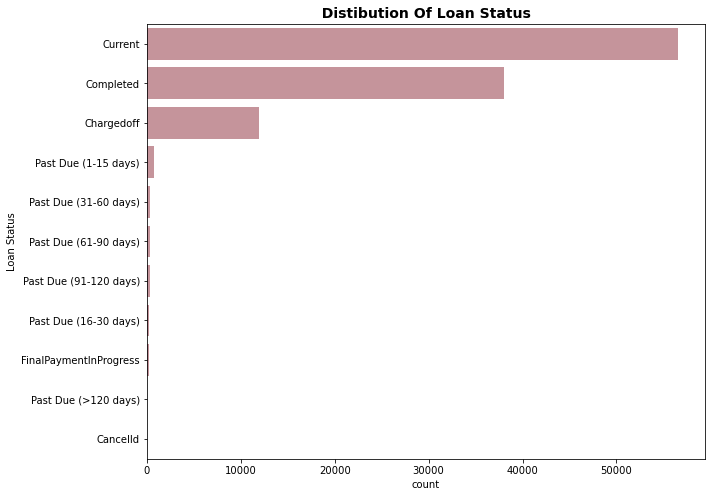

In [19]:
# Plot the Loans Status on a Horizontal bar chart
plt.figure(figsize=[10,8])
cat_order = loandf['Loan Status'].value_counts().index
sns.countplot(data=loandf, y='Loan Status', order=cat_order , color='#CD8C95');
plt.title('  Distibution of Loan Status  '.title(),fontsize = 14, weight = "bold");

##### We can see from the bar chart the most current loans are with 50,000 and the completed is with less 40,000. 

In [59]:
Emp_Stat = ["Employed","Self-employed","Full-time","Part-time","Retired","Other","Not employed", "Not available"]


In [65]:
loandf['EmploymentStatus'] = pd.Categorical(loandf['EmploymentStatus'], categories=Emp_Stat, ordered=True)


In [66]:
loandf['EmploymentStatus'] = loandf['EmploymentStatus'].astype(ordered_var)

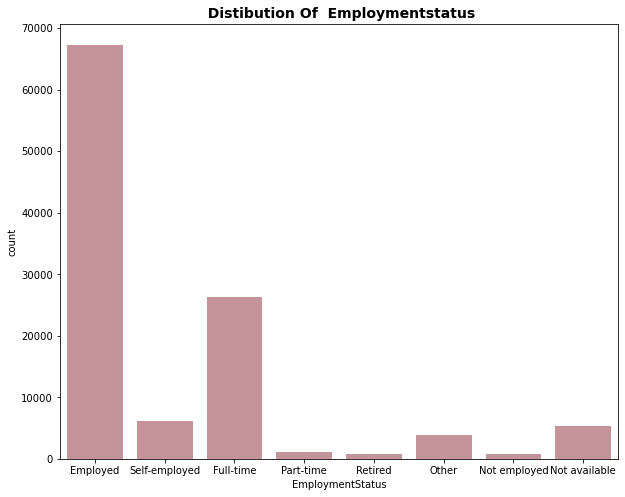

In [67]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'EmploymentStatus',color = '#CD8C95');
plt.title('  Distibution of  EmploymentStatus '.title(),fontsize = 14, weight = "bold");

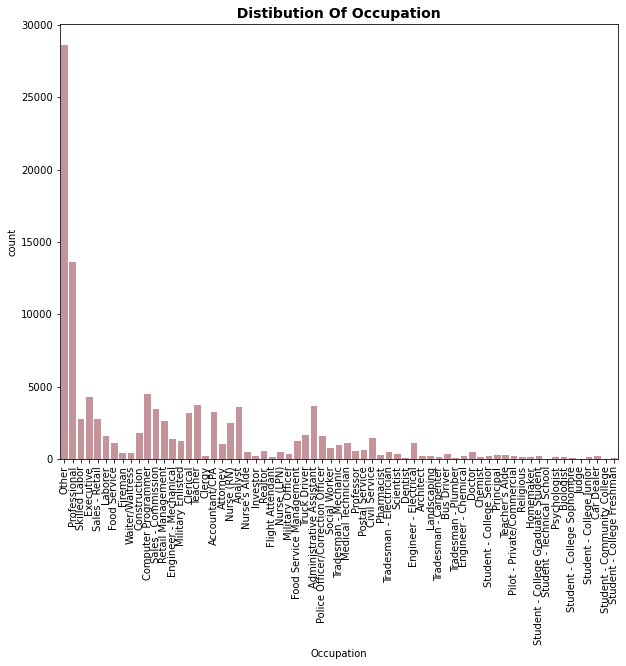

In [69]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'Occupation',color = '#CD8C95');
plt.title('  Distibution of Occupation  '.title(),fontsize = 14, weight = "bold");
plt.xticks(rotation=90);

##### After the ‘Others’, the top occupations counts are  ‘Professional’, ‘computer programmer’,’ "Executives" and ‘Teacher’.The largest amount of borrowers are employed and full-time.

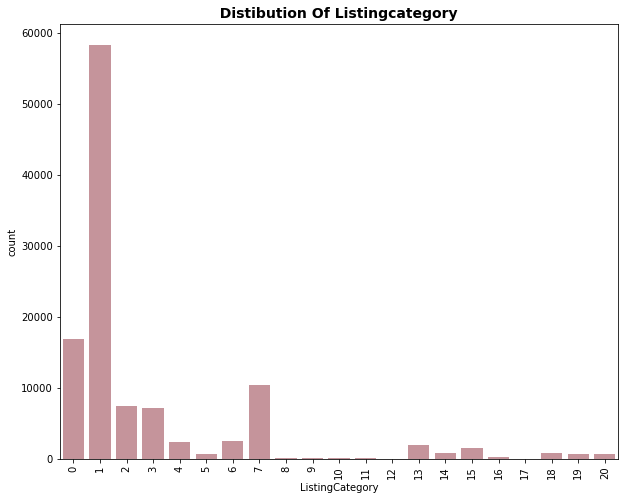

In [22]:
# Plot the loandf ListingCategory on a Vertical bar chart
plt.figure(figsize=[10,8])
plt.title('  Distibution of ListingCategory  '.title(),fontsize = 14, weight = "bold");
sns.countplot(data=loandf, x='ListingCategory', color='#CD8C95' );
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

##### We can From the barplot, That the most loans services offered byProsper are Debt Consolidation, Home Improvement.

In [23]:
Incomerang_ordered = ["$0","$1-24,999","$25,000-49,999", "$50,000-74,999" , "$75,000-99,999", "$100,000+" ,
                      "Not displayed"  ,"Not employed" ]

In [24]:
loandf['Income Range'] = pd.Categorical(loandf['IncomeRange'], categories=Incomerang_ordered , ordered=True)

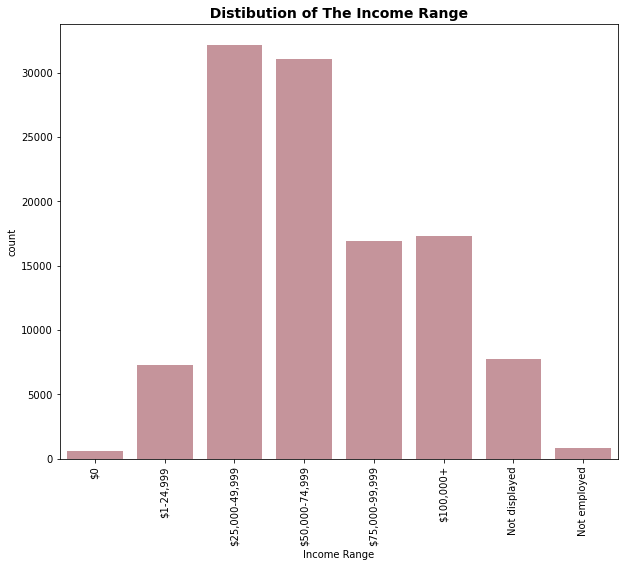

In [25]:
# Plot the loandf ListingCategory on a Vertical bar chart
plt.figure(figsize=[10,8])
plt.title('  Distibution of The Income Range  ',fontsize = 14, weight = "bold");
sns.countplot(data=loandf, x='Income Range', color='#CD8C95' );
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

##### From the Plot of the The income range of the borrower it tells that the large majority of borrowers make less than $100,000 per year

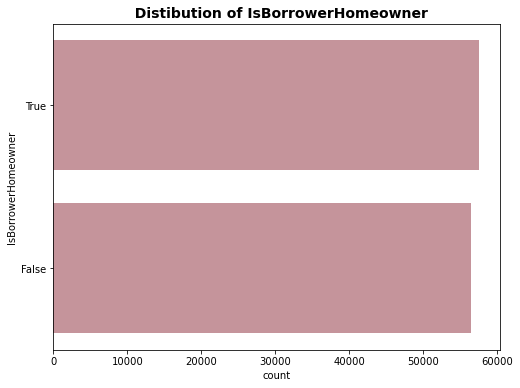

In [26]:
# Plot the IsBorrowerHomeowner on a Horizontal bar chart
# Plot the loandf ListingCategory on a Vertical bar chart
plt.figure(figsize=[8,6])
plt.title('  Distibution of IsBorrowerHomeowner' ,fontsize = 14, weight = "bold");
cat_order = loandf['IsBorrowerHomeowner'].value_counts().index
sns.countplot(data=loandf, y='IsBorrowerHomeowner', order=cat_order,color='#CD8C95');

##### The plot shows that half Borrowers  is  home owner's

# 

## Now explorering the Numeric varibles

In [27]:
def histchart (lonadf,xVar,color='#CD8C95'): 
    loandf[xVar].hist(grid=False,bins=40,figsize=[13,8],color=color)
    plt.title(f'disrbution of {xVar}'.title(), fontsize=10, weight="bold")
    plt.xlabel(xVar.title(), fontsize=10, weight="bold")
    plt.ylabel('Frequency', fontsize=10, weight="bold")

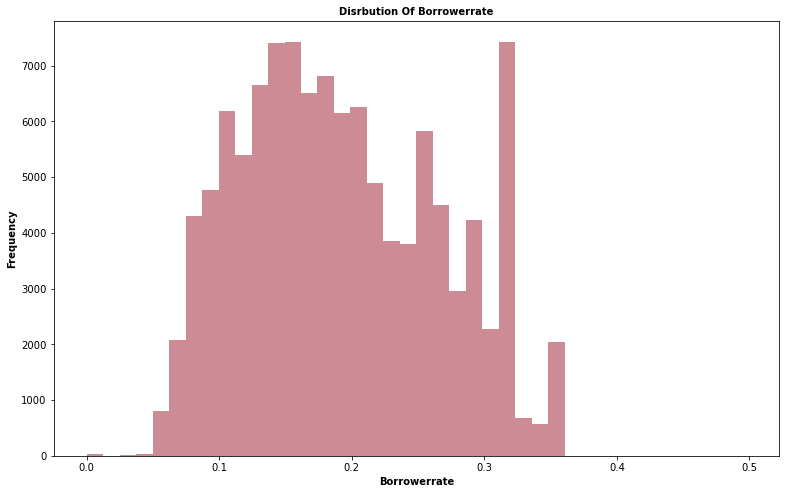

In [28]:
histchart(loandf,'BorrowerRate')

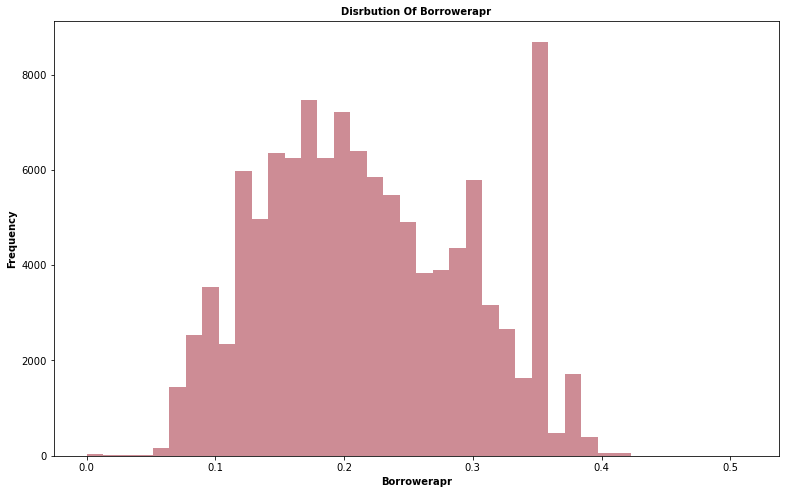

In [29]:
histchart(loandf,'BorrowerAPR')


We can see the distribution of BorrowerRate BorrowerAPR and, it looks there is just a small difference.

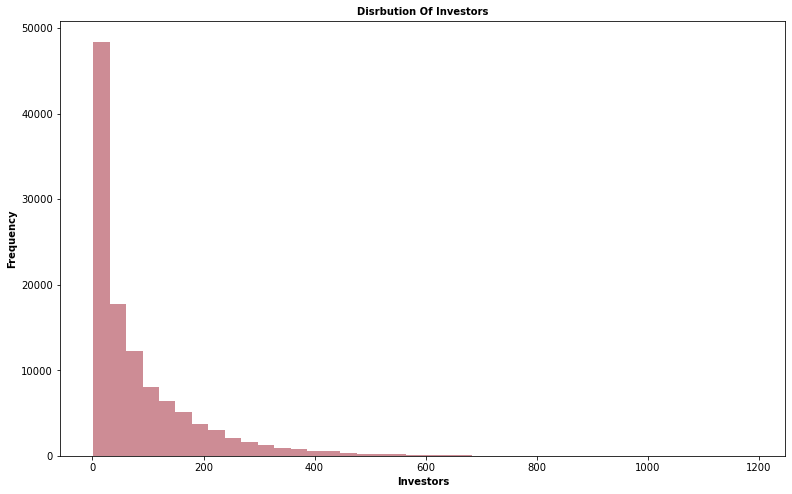

In [30]:
histchart(loandf,'Investors')


 The chart shows right-skewed distribution,which means most number of investros are less than 400 on diffrent loans .

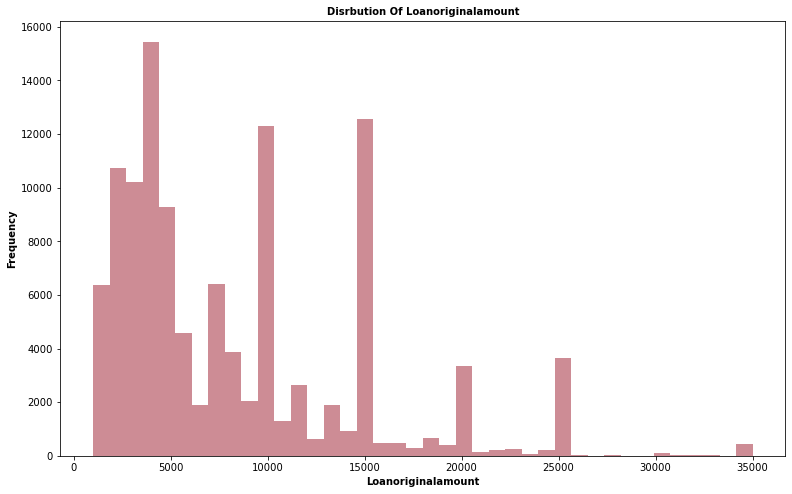

In [31]:
histchart(loandf,'LoanOriginalAmount') 

##### we can see that the distributionLoan amount exhibits right-skewed, mean > median, big amount at 10,000 and 15,000 and 5,000 and Small amount at20,000 - 25,000 amd 35,000 which means the most loans are with less than 10,000 amount.

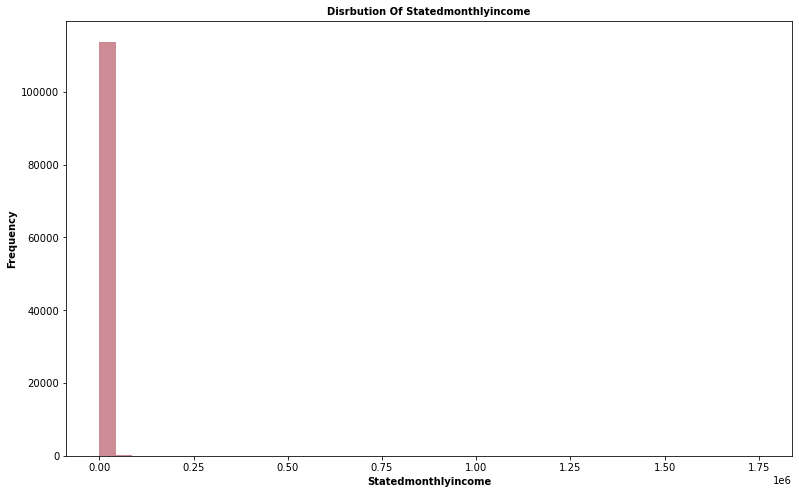

In [32]:
histchart(loandf,'StatedMonthlyIncome')

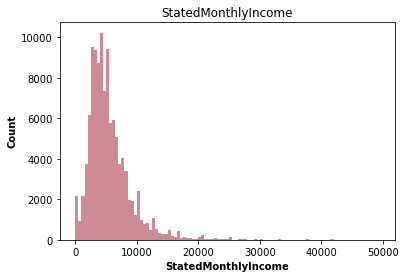

In [33]:
# Plot another chart for Distribution of stated monthly income
# bins for accurte result 

bins_dis = np.arange(0, 50000, 500)
plt.hist(data = loandf, x = 'StatedMonthlyIncome', bins=bins_dis,color='#CD8C95');
plt.title('StatedMonthlyIncome');
plt.xlabel(('StatedMonthlyIncome'), fontsize=10, weight="bold");
plt.ylabel('Count', fontsize=10, weight="bold");

## The distribution of stated monthly income is severely right skewed,with most of stated monthly income less than 20k.



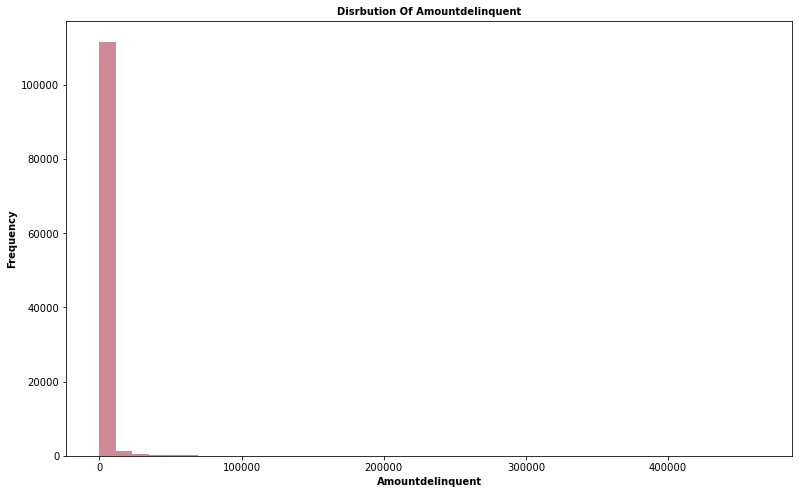

In [34]:
histchart(loandf,'AmountDelinquent')

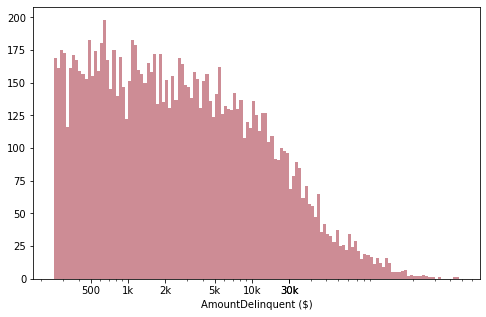

In [35]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(loandf['AmountDelinquent'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'AmountDelinquent', bins = bins,color='#CD8C95')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 2e4 ],[500, '1k', '2k', '5k', '10k','20k','30k']) 
plt.xlabel('AmountDelinquent ($)')
plt.show()

The distribution of AmountDelinquent is right skewed, 
it means that most of Amount Delinquent of loans is no more than 500 .



AmountDelinquent has a long-tailed distribution, shows the Delinquent is no more less than 100,000. 

When plotted on a log-scale, theAmountDelinquent looks right skewed, 
it means that most of Amount Delinquent of loans is less than 30k .
with one peak between 5000 and 2000, and a second peak a little below 1000. 



The most loan statues in the dataset is curent and  completed  , 
with most of them are also with 60-36 month.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


### It is not necessary to make any transformations, because There are no outstanding points.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

none




## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [36]:
num_var = ['Term','BorrowerAPR','BorrowerRate','ListingCategory','LoanOriginalAmount',
                 'AmountDelinquent','StatedMonthlyIncome','Investors'] 

cat_var= ['LoanStatus','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange'] 


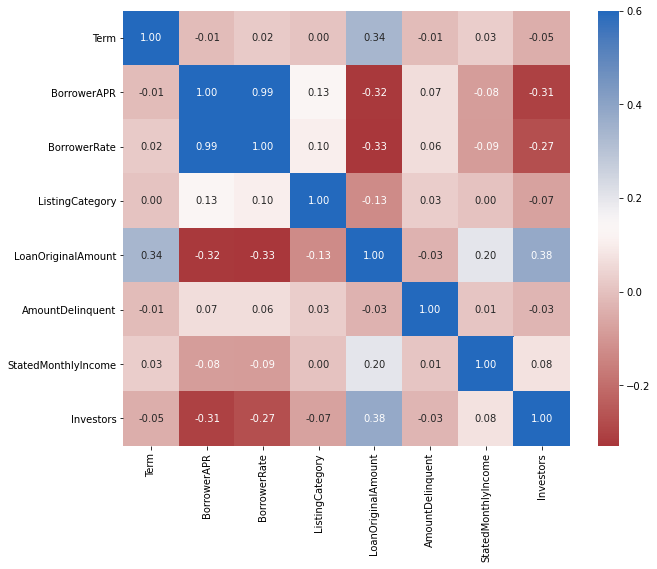

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(loandf[num_var].corr(), vmax=0.6, annot = True, fmt = '.2f', cmap = 'vlag_r');

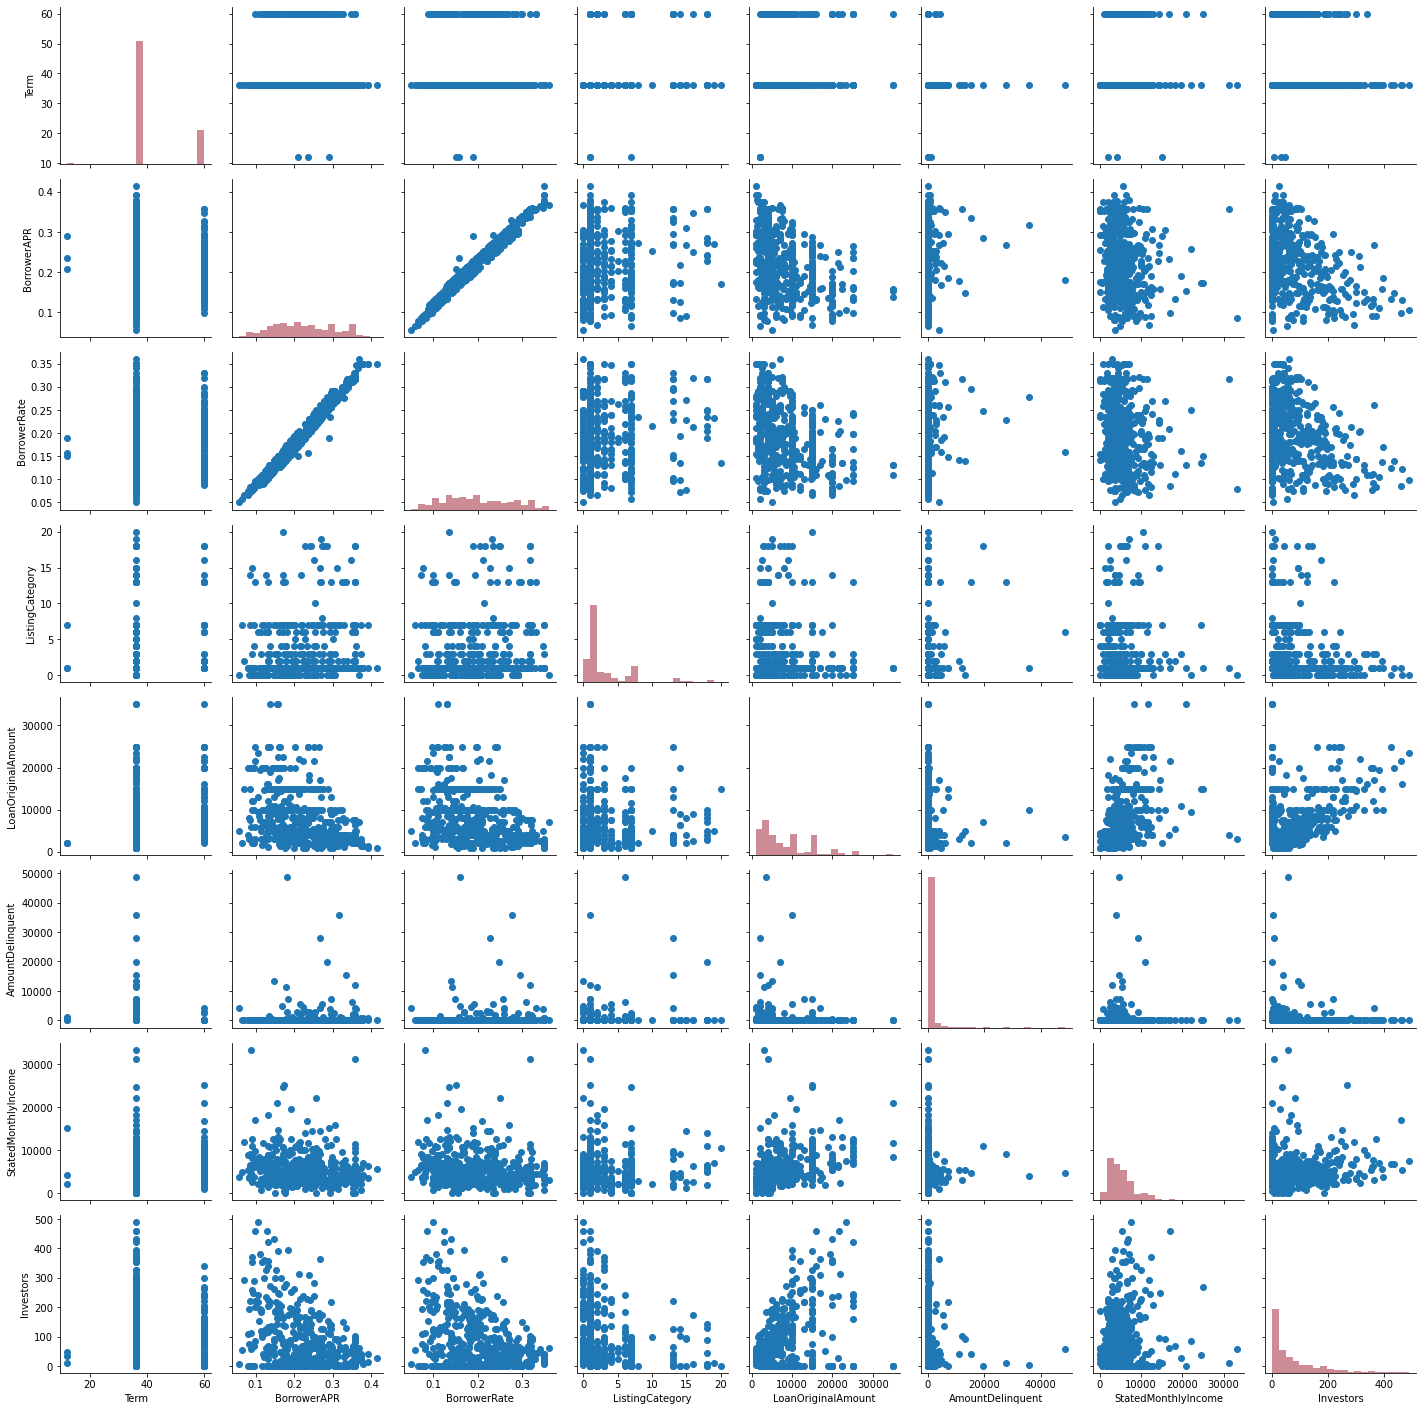

In [38]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(loandf.shape[0], 500, replace = False)
loan_samp = loandf.loc[samples,:]
g = sns.PairGrid(data = loan_samp , vars = num_var )
g = g.map_diag(plt.hist, bins = 20,color='#CD8C95');
g.map_offdiag(plt.scatter);

The loan original amount has a positive correlation with the stated monthly income and Term (Number of months ), and No. of Investors, it makes sense since the more The loan original amount, more months to pay, and the borrower has a higher monthly income and of course investors on this loans.



###### Now, Let's jump into looking at how these variables are correlated with the other categorical variables.

In [39]:
#function for titles
def titleLabel(title,xLabel,yLabel):
    
 plt.title(title.title(),fontsize=13,weight="bold"); 
 plt.xlabel(xLabel.title(),fontsize=13 ,weight="bold") ;
 plt.ylabel(yLabel.title(),fontsize=13 ,weight="bold");

In [40]:
num_var = ['Term','BorrowerAPR','BorrowerRate','ListingCategory','LoanOriginalAmount',
                 'AmountDelinquent','StatedMonthlyIncome','Investors'] 
cat_var= ['LoanStatus','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange'] 


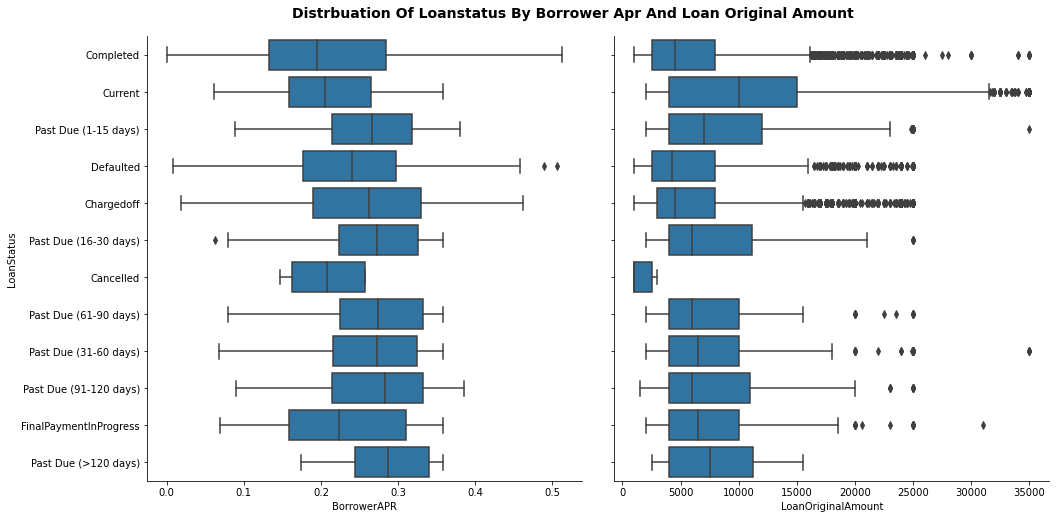

In [41]:
# plot matrix of numeric features against categorical features.

g = sns.PairGrid(data = loandf, y_vars = ['LoanStatus'] , 
                x_vars = ['BorrowerAPR' ,'LoanOriginalAmount'], height = 3, aspect = 1.5);

default_color = sns.color_palette()[0]

g.map(sns.boxplot,orient='h', color = default_color);

plt.suptitle("Distrbuation of LoanStatus by Borrower APR and Loan Original Amount ".title(),y=1,fontsize=14 ,weight = "bold" )
g.fig.set_size_inches(14,8);


NameError: name 'EmploymentStatus' is not defined

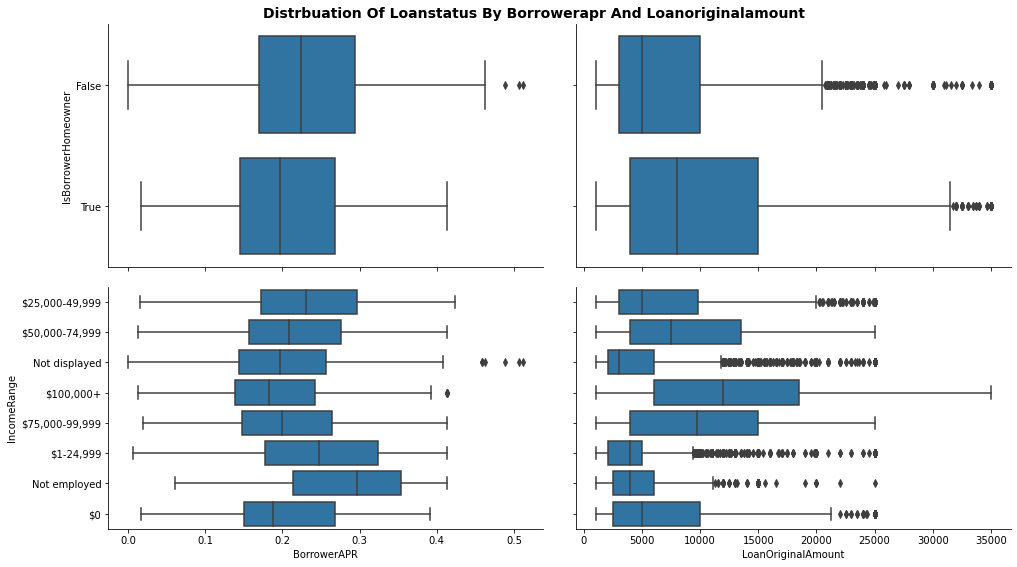

In [42]:

# plot matrix of numeric features against categorical features.

g = sns.PairGrid(data = loandf, y_vars = ['IsBorrowerHomeowner','IncomeRange'] , 
                x_vars = ['BorrowerAPR' ,'LoanOriginalAmount'], height = 3, aspect = 1.5);

default_color = sns.color_palette()[0]

g.map(sns.boxplot,orient='h', color = default_color);

plt.suptitle("Distrbuation of LoanStatus by BorrowerAPR and LoanOriginalAmount ".title(),y=1,fontsize=14 ,weight = "bold" )
g.fig.set_size_inches(14,8);
EmploymentStatus



In [ ]:

# plot matrix of numeric features against categorical features.

g = sns.PairGrid(data = loandf, y_vars = ['EmploymentStatus'] , 
                x_vars = ['BorrowerAPR' ,'LoanOriginalAmount'], height = 3, aspect = 1.5);

default_color = sns.color_palette()[0]

g.map(sns.boxplot,orient='h', color = default_color);

plt.suptitle("Distrbuation of LoanStatus by BorrowerAPR and LoanOriginalAmount ".title(),y=1,fontsize=14 ,weight = "bold" )
g.fig.set_size_inches(14,8);




Interestingly, it appears that there are some poseitive relationships between the categorical variables 
and the two numeric variables of interest. 

Finally, let's look at relationships between the categorical features.

In [ ]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=90);
sns.countplot(data = loandf, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'cubehelix')
titleLabel('Distrbuation of LoanStatus by Is Borrower Home owner ','LoanStatus','Frequency',)

In [ ]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'cubehelix')
plt.xticks(rotation=70);
titleLabel('Distrbuation of LoanStatus by EmploymentStatus ','loansatus','Frequency')

In [ ]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'LoanStatus', hue = 'IncomeRange', palette = 'cubehelix')
plt.xticks(rotation=70);
titleLabel('Distrbuation of LoanStatus by IncomeRange ','loansatus','Frequency')

###### There doesn't seem to be that much interaction between LoanStatus  and EmploymentStatus, 
though proportionally it seems like there might be more "Employed " is with current loans.

There are slightly larger interactions on 'IsBorrowerHomeowner', especially on current and completd loans.

And for 'IncomeRange'it seem there is a much interaction with LoanStatus.


## With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. 


First, I want to see how BorrowerAPR and LoanOriginalAmount are related to one another for all of the data

In [ ]:
plt.figure(figsize = [10, 8])
plt.title('  Distibution of BorrowerAPR by LoanOriginalAmount  ',fontsize = 14, weight = "bold");
sns.regplot(data = loandf, x = 'BorrowerAPR', y = 'LoanOriginalAmount', scatter_kws={'alpha':0.01});

##### This plot shows that the range of APR decrease with the increase of loan amount,
Overall, the borrower APR is negatively correlated with loan amount.


In [ ]:
plt.figure(figsize = [10, 8])
plt.title('  Distibution of  ListingCategory by Investors ',fontsize = 14, weight = "bold");
sns.regplot(data = loandf, x = 'ListingCategory', y = 'Investors', scatter_kws={'alpha':0.01});


I'm interested in figuring out if there is any category that is funded more by the investors, but it is negatively correlated


In [ ]:
# ListingCategory effect on relationship of APR and loan amount
g=sns.FacetGrid(data=loandf, aspect=1.2, height=5, col='ListingCategory', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

###### The loan amount increase with some Catogery . The borrower APR decrease with some Catogery.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶


 - In gerenral at each ListingCategory by increasing the LoanOriginalAmount, the APR decreases.
 - I'm interested in figuring out if there is any category that is funded more by the investors, but it is         negatively correlated
- for 'IncomeRange'it seem there is a much interaction with LoanStatus



##### Were there any interesting or surprising interactions between features?¶



- APR with number of investors. 